In [10]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
dataset_sentences = "/content/drive/MyDrive/LSTM/datasetSentences.txt"
sentiment_labels = "/content/drive/MyDrive/LSTM/sentiment_labels.txt"

# Read the dataset sentences
data = pd.read_csv(dataset_sentences, delimiter='\t', encoding='latin-1')
# Read the sentiment labels
sentiment_data = pd.read_csv(sentiment_labels, delimiter='|')

# Merge the two datasets on 'sentence_index'
merged_data = pd.merge(data, sentiment_data, left_on='sentence_index', right_on='phrase ids')

# Preprocess the data
max_length = 100  # Maximum length of input sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(merged_data['sentence'])
sequences = tokenizer.texts_to_sequences(merged_data['sentence'])
X = pad_sequences(sequences, maxlen=max_length)
y = merged_data['sentiment values']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SimpleRNN model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_length),
    SimpleRNN(8, return_sequences=True),  # Add the first SimpleRNN layer with return_sequences=True
   # SimpleRNN(32),  # Add another SimpleRNN layer
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)


Epoch 1/5
238/238 [==============================] - 15s 56ms/step - loss: 0.0409 - val_loss: 0.0318
Epoch 2/5
238/238 [==============================] - 13s 55ms/step - loss: 0.0306 - val_loss: 0.0311
Epoch 3/5
238/238 [==============================] - 13s 55ms/step - loss: 0.0297 - val_loss: 0.0309
Epoch 4/5
238/238 [==============================] - 13s 53ms/step - loss: 0.0293 - val_loss: 0.0311
Epoch 5/5
75/75 [==============================] - 1s 9ms/step - loss: 0.0311
Test Loss: 0.03113202191889286


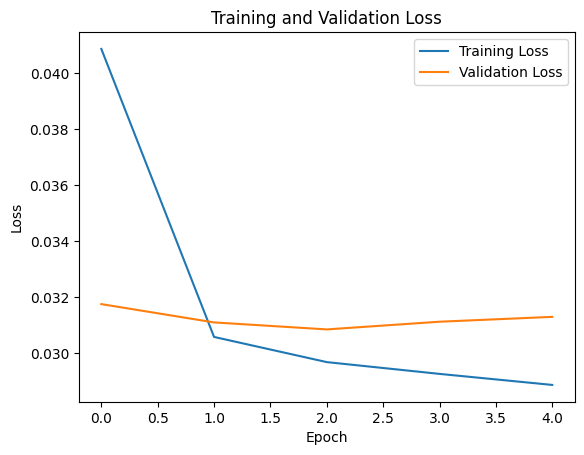

In [11]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()